In [34]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from utils import PlotBode, readPd, parallelZ, parallelABC, calcR2
from scipy.optimize import curve_fit

df = readPd('C_HP.csv')
# reinterpret as float
df = df.astype(float)

f = df['Frecuencia'].values
Z_s = df['|Z|[uS]'].values * 1e-6
Z_mod = (1/Z_s)
Z_phase = -df['Fase'].values

In [3]:
def serialize(Z):
    return np.concatenate((Z.real, Z.imag))

popt: [1.6707222e-08, 0.239234146, 1.25526788e-07]
R2:  0.9999350897043545


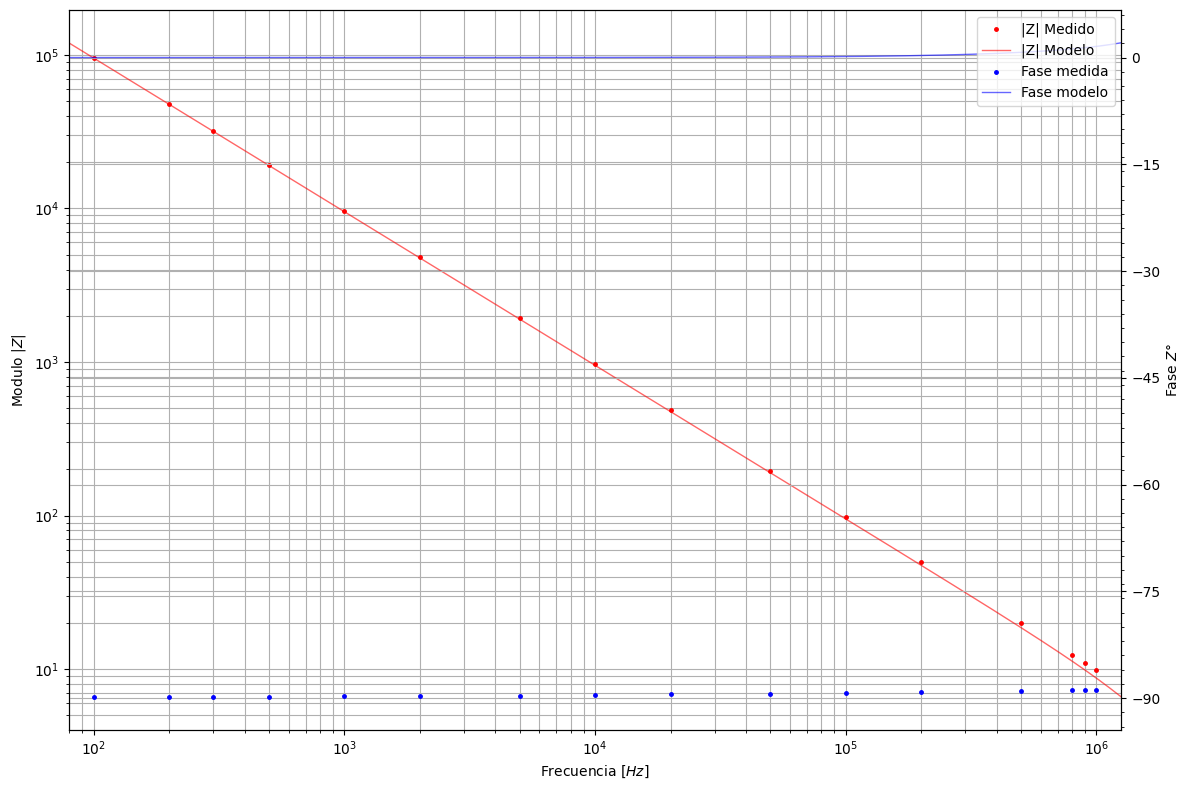

In [35]:
def Impedance(f, C, esr, esl):
    s = 1j*2*np.pi*f
    
    Z = 1/(s*C) + esr + s*esl

    mod = np.abs(Z)
    phase = np.angle(Z, deg=True) + 90
    return mod, phase

def opti_func(f, C, esr, esl):
    mod, phase = Impedance(f, C, esr, esl)
    return np.concatenate((mod, phase))


y_data = np.concatenate((Z_mod, Z_phase))

# popt = None
popt = [1.67072220e-08, 2.39234146e-01, 1.25526788e-7]
# popt, pcov = curve_fit(opti_func, f, y_data, p0=popt, maxfev=100000, bounds=[1e-15, 1e4])
print("popt:", popt)

R2 = calcR2(y_data, opti_func(f, *popt))
print("R2: ", R2)

# Plot
expf_min = np.log10(np.min(f)) - 0.1
expf_max = np.log10(np.max(f)) + 0.1
f2 = np.logspace(expf_min, expf_max, 1000)

mod, phase = Impedance(f2, *popt)

plot = PlotBode(figsize=(12, 8))
plot.plotLoglog1(f, Z_mod, lw=0, marker='.', label='|Z| Medido', color='red', markersize=5)
plot.plotSemilog2(f, Z_phase, lw=0, marker='.', label='Fase medida', color='blue', markersize=5)

plot.plotLoglog1(f2, mod, lw=1, label='|Z| Modelo', color='red', alpha=0.6)
plot.plotSemilog2(f2, phase, lw=1, label='Fase modelo', color='blue', alpha=0.6)

plot.show(loc='upper right')  # min2loc=0.1, maj2loc=0.5